<a href="https://colab.research.google.com/github/vifirsanova/OCR_Glossary/blob/main/workbook_gensim_phrases_old_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
# использование цвета для вывода на экран
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from gensim.utils import simple_preprocess, simple_tokenize
from gensim.parsing.preprocessing import STOPWORDS

import numpy as np

import pandas as pd

In [4]:
from pathlib import Path

import re

from colorama import Fore, Style

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Загрузка нескольких файлов

* загружаем файлы из GitHub
* соединяем их в одной переменной

In [5]:
!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Geology.txt
!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Physical_Geology_2nd_Ed.txt
!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Lumen-Learning-Geology.txt

# проверяем наличие загруженных файлов в директории
# с помощью консольной команды ls

!ls

--2023-02-12 12:15:43--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Geology.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207953 (203K) [text/plain]
Saving to: ‘Geology.txt’

Geology.txt         100%[===================>] 203.08K  --.-KB/s    in 0.02s   

2023-02-12 12:15:44 (8.15 MB/s) - ‘Geology.txt’ saved [207953/207953]

--2023-02-12 12:15:44--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Physical_Geology_2nd_Ed.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1268676 (1.2M) [t

In [6]:
# прочитываем все файлы с помощью метода read_text из библиотеки Path
# мы можем выполнить это параллельно, 
# то есть за одну команду одновременно обработать несколько файлов

text0, text1, text2 = Path('Geology.txt').read_text(), Path('Lumen-Learning-Geology.txt').read_text(), Path('Physical_Geology_2nd_Ed.txt').read_text()

# посмотрим на часть одного из текстов

print(text2[:900])

https://opentextbc.ca/physicalgeology2ed/
Physical Geology - 2nd Edition
Physical Geology - 2nd Edition
Steven Earle
Karla Panchuk
BCcampus
Victoria, B.C.
Icon for the Creative Commons Attribution 4.0 International License

Physical Geology - 2nd Edition by Steven Earle is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.

© 2019 Steven Earle

The CC licence permits you to retain, reuse, copy, redistribute, and revise this book—in whole or in part—for free providing the author is attributed as follows:

Physical Geology – 2nd Edition by Steven Earle is used under a Creative Commons Attribution 4.0 International Licence.
If you redistribute all or part of this book, it is recommended the following statement be added to the copyright page so readers can access the original book at no cost:

Download for free from the B.C. Open Collection


Какие артефакты бросаются нам в глаза в этом тексте?

In [7]:
# объединим все файлы в один и посмотрим его статистику

text = " ".join([text0, text1, text2])

#print(f'Статистическое описание сырого документа\n\n{Fore.RED}Длина документа:{Style.RESET_ALL} {len(text)} символов\n\
#{Fore.RED}Приблизительное количество слов в документе:{Style.RESET_ALL} {len(text.split(" "))}')

Какие статистические данные по сырому тексту нам могут быть интересны?

Как их получить?

# Предобработка данных

UPD: Разбиение текста по предложениям

In [8]:
# разбиваем текст на предложения по точке

split_text = text.split('\n')

split_text

['SOURCE: https://opengeology.org/textbook/1-understanding-science/',
 '====================',
 'I DO NOT OWN THE TEXT. THE TEXT IS BEING USED FOR NON-COMMERCIAL EDUCATIONAL PURPOSES.',
 '---------------------',
 'An Introduction to Geology',
 'Free Textbook for College-Level Introductory Geology Courses',
 '1 Understanding Science',
 'STUDENT LEARNING OUTCOMES',
 'At the end of this chapter, students should be able to:',
 'Contrast objective versus subjective observations, and quantitative versus qualitative observations.',
 'Identify a pseudoscience based on its lack of falsifiability',
 'Contrast the methods used by Aristotle and Galileo to describe the natural environment.',
 'Explain the scientific method and apply it to a problem or question.',
 'Describe the foundations of modern geology, such as the principle of uniformitarianism.',
 'Contrast uniformitarianism with catastrophism.',
 'Explain why studying geology is important.',
 'Identify how Earth materials are transformed by

In [9]:
# чистим получившийся список

sentences = [sentence for sentence in split_text if len(sentence) > 2]

sentences

['SOURCE: https://opengeology.org/textbook/1-understanding-science/',
 '====================',
 'I DO NOT OWN THE TEXT. THE TEXT IS BEING USED FOR NON-COMMERCIAL EDUCATIONAL PURPOSES.',
 '---------------------',
 'An Introduction to Geology',
 'Free Textbook for College-Level Introductory Geology Courses',
 '1 Understanding Science',
 'STUDENT LEARNING OUTCOMES',
 'At the end of this chapter, students should be able to:',
 'Contrast objective versus subjective observations, and quantitative versus qualitative observations.',
 'Identify a pseudoscience based on its lack of falsifiability',
 'Contrast the methods used by Aristotle and Galileo to describe the natural environment.',
 'Explain the scientific method and apply it to a problem or question.',
 'Describe the foundations of modern geology, such as the principle of uniformitarianism.',
 'Contrast uniformitarianism with catastrophism.',
 'Explain why studying geology is important.',
 'Identify how Earth materials are transformed by

## Чистка данных с помощью RegEx

Вспомним отрывок одного из текстов:

```
https://opentextbc.ca/physicalgeology2ed/\nPhysical Geology - 2nd Edition\nPhysical Geology - 2nd Edition\nSteven Earle\nKarla Panchuk\nBCcampus\nVictoria, B.C.\nIcon for the Creative Commons Attribution 4.0 International License\n\nPhysical Geology - 2nd Edition by Steven Earle is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.\n\n© 2019 Steven Earle\n\nThe CC licence permits you to retain, reuse, copy, redistribute, and revise this book—in whole or in part—for free providing the author is attributed as follows:\n\nPhysical Geology – 2nd Edition by Steven Earle is used under a Creative Commons Attribution 4.0 International Licence.\nIf you redistribute all or part of this book, it is recommended the following statement be added to the copyright page so readers can access the original book at no cost:\n\nDownload for free from the B.C. Open Collection

```

Мы обратили внимание на некоторые артефакты:

* ссылки
* абзацные отступы
* специальные символы, например `©`
* ???

Проверим, верна ли наша гипотеза.




In [10]:
# ссылки

link_pattern = re.compile(r'https?://\S+|www\.\S+')
links = re.findall(link_pattern, text)

#print(f'{Fore.RED}Количество обнаруженных ссылок:{Style.RESET_ALL} {len(links)}\n{Fore.RED}Образцы ссылок:{Style.RESET_ALL} {links[:3]}')
#
# специальные символы

symbol_pattern = re.compile(r'[^a-zA-Z0-9 .,:;…()!?\-—]+')
symbols = re.findall(symbol_pattern, text)

#print(f'\n{Fore.RED}Количество обнаруженных специальных символов:{Style.RESET_ALL} {len(symbols)}\n{Fore.RED}Образцы уникальных символов:{Style.RESET_ALL} {set(symbols[500:1000])}')

# любые символы

any_symbol_pattern = re.compile(r'[^a-zA-Z ]+')
all_symbols = re.findall(any_symbol_pattern, text)

#print(f'\n{Fore.RED}Количество обнаруженных символов:{Style.RESET_ALL} {len(all_symbols)}\n{Fore.RED}Образцы уникальных символов:{Style.RESET_ALL} {set(all_symbols[500:600])}')

Мы хотим проверить, какое влияние окажет удаление знаков препинания на результат работы нашей программы.

Для этого создадим три функции для чистки текста: 
- первая сохраняет знаки препинания и цифры
- вторая очищает текст от знаков препинания
- третья удаляет все символы кроме букв

In [11]:
def clean(text):
  ### сохраняет знаки препинания и цифры ###

  # удаляем из текста ссылки 
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  
  # удаляем специальные символы
  # оставляем знаки препинания и цифры
  text = re.sub('[^a-zA-Z0-9 .,:;…()!?\-—]+', ' ', text)

  # возвращаем текст, очищенный от лишних пробелов
  # которые появились в результате обработки
  return re.sub('\s+', ' ', text)

def full_clean(text):
  ### очищает текст от знаков препинания ###

  # удаляем из текста ссылки 
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  
  # удаляем специальные символы
  # оставляем цифры
  text = re.sub('[^a-zA-Z0-9 ]+', ' ', text)

  # возвращаем текст, очищенный от лишних пробелов
  # которые появились в результате обработки
  return re.sub('\s+', ' ', text)

def digits_clean(text):
  ### удаляет все символы кроме букв ###

  # удаляем из текста ссылки 
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  
  # удаляем специальные символы
  # удаляем цифры
  text = re.sub('[^a-zA-Z ]+', ' ', text)

  # возвращаем текст, очищенный от лишних пробелов
  # которые появились в результате обработки
  return re.sub('\s+', ' ', text)

cleaned, full_cleaned, digits_cleaned = [clean(sentence) for sentence in sentences], \
[full_clean(sentence) for sentence in sentences], [digits_clean(sentence) for sentence in sentences]

#print(f'{Fore.RED}* Образец, очищенный с помощью функции clean (сохраняет знаки препинания и цифры){Style.RESET_ALL}\n"{cleaned[117]}"\n\n \
#{Fore.RED}* Образец, очищенный с помощью функции full_clean (очищает текст от знаков препинания){Style.RESET_ALL}\n"{full_cleaned[117]}"\n\n \
#{Fore.RED}* Образец, очищенный с помощью функции digits_clean (удаляет все символы кроме букв){Style.RESET_ALL}\n"{digits_cleaned[117]}"')

## Токенизация

Рассмотрим несколько способов токенизации и создадим для каждого отдельную функцию.

UPD: добавлены simple_preprocess и simple_tokenize (Gensim)

In [12]:
# простая токенизация

def simple_tokenizer(text):
  # принимает на вход текст
  # приводит текст к нижнем регистру с помощью lower()
  # "рубит" текст на элементы, разделенные пробелом (слова)
  return text.lower().split(' ')

# токенизация методами NLTK

def nltk_tokenizer(text):
  # применяет метод word_tokenize из nltk к тексту
  return word_tokenize(text)

# токенизация с помощью gensim https://radimrehurek.com/gensim/utils.html

def gensim_tokenizer(text, deacc, min_len, max_len):
  # применяет метод simple_preprocess из gensim к тексту
  # encode: кодировка текст
  # deacc удаляет знаки препинания, принимает значения True / False
  # min_len и max_len принимают минимальную и максимальную длину слова
  # для фильтрации корпуса от слишком коротких и слишком длинных слов
  # т.е. удаления союзов и каких-либо ошибочных выдач
  return simple_preprocess(text, deacc, min_len, max_len)

def gensim_simple_tokenizer(text):
  # применяет метод simple_tokenize из gensim к тексту
  return list(simple_tokenize(text))

tokenized, nltk_tokenized, gensim_tokenized, gensim_tokenized_simple = [simple_tokenizer(sentence) for sentence in cleaned], \
[nltk_tokenizer(sentence) for sentence in cleaned], [gensim_tokenizer(sentence, True, 3, 15) for sentence in cleaned],\
[gensim_simple_tokenizer(sentence) for sentence in cleaned]

#print(f'{Fore.RED}* Образец, токенизированный с помощью функции simple_tokenizer {Style.RESET_ALL}\n"{tokenized[117]}"\n\n \
#{Fore.RED}* Образец, токенизированный с помощью функции nltk_tokenizer {Style.RESET_ALL}\n"{nltk_tokenized[117]}"\n\n \
#{Fore.RED}* Образец, токенизированный с помощью функции gensim_preprocess {Style.RESET_ALL}\n"{gensim_tokenized[117]}"\n\n \
#{Fore.RED}* Образец, токенизированный с помощью функции gensim_tokenizer {Style.RESET_ALL}\n"{gensim_tokenized_simple[117]}"')

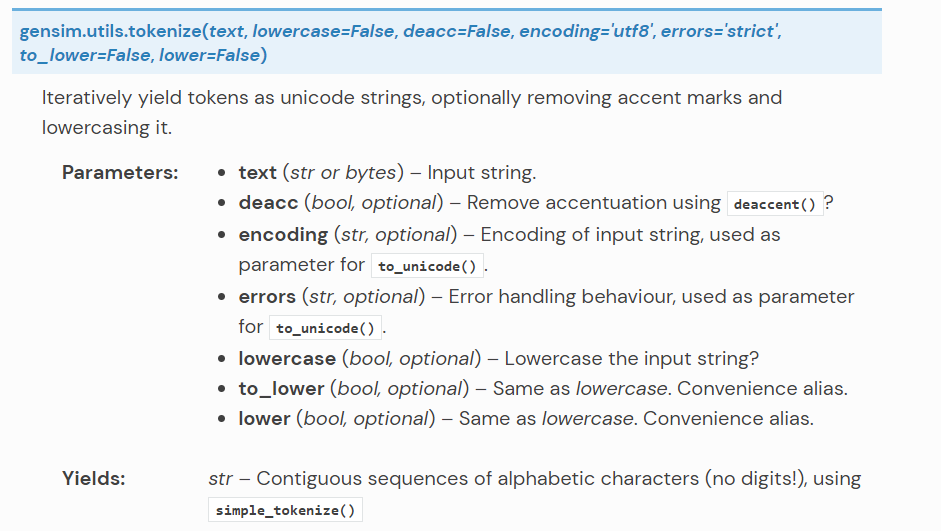

Также мы можем применить tokenize() из Gensim, который встроен в simple_proprocess

## Удаление стоп-слов

Попробуем три опции: 

- загрузка стоп-слов, которые предоставляет NLTK
- загрузка стоп-слов, которые предоставляет Spacy
- загрузка стоп-слов, которые предоставляет Gensim

UPD: функция для добавления собственных стоп-слов

In [13]:
# сохраняем список слов NLTK в переменную

nltk_sw = stopwords.words('english')

# загрузка spacy для английского языка

en = spacy.load('en_core_web_sm')

# загрузка стоп-слов Spacy

spacy_sw = en.Defaults.stop_words

# загрузка стоп-слов из gensim

gensim_sw = STOPWORDS

def clean_sw(text, sw):
  # принимает токенизированный текст

  # чтобы удалить стоп-слова, "пробежимся" по токенизированному списку
  # если слово отсутсвует в списке стоп-слов, сохраним его в новый список
  return [x for x in text if not x in sw]

no_sw_nltk, no_sw_spacy, no_sw_gensim = [clean_sw(sentence, nltk_sw) for sentence in gensim_tokenized], \
[clean_sw(sentence, spacy_sw) for sentence in gensim_tokenized], [clean_sw(sentence, gensim_sw) for sentence in gensim_tokenized]

#print(f'{Fore.RED}* Образец, очищенный от стоп-слов с помощью функции NLTK {Style.RESET_ALL}\n"{no_sw_nltk[1:4]}"\n\n \
#{Fore.RED}* Образец, очищенный от стоп-слов с помощью функции Spacy {Style.RESET_ALL}\n"{no_sw_spacy[1:4]}"\n\n \
#{Fore.RED}* Образец, очищенный от стоп-слов с помощью функции Gensim {Style.RESET_ALL}\n"{no_sw_gensim[1:4]}"')

Нужно решить, в каком формате мы будем хранить стоп-слова, например, это может быть список в *.txt

В репозиторий добавлен список стоп-слов, который можно дополнить вручную

In [14]:
# загрузка стоп-слов

!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/stopwords.txt

new_stopwords = Path('stopwords.txt').read_text()

--2023-02-12 12:15:56--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41 [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]      41  --.-KB/s    in 0s      

2023-02-12 12:15:56 (1.20 MB/s) - ‘stopwords.txt’ saved [41/41]



In [15]:
# сырые данные нужно преобразовать в "машиночитаемый" список

new_stopwords

'commons\nedition\neducational\nfigure\ntable\n'

In [16]:
# для этого достаточно разделить список по абзацному отступу

new_stopwords = new_stopwords.split('\n')
new_stopwords

['commons', 'edition', 'educational', 'figure', 'table', '']

In [17]:
# посмотрим на типы стоп-слов в каждой из выбранных библиотек 
# можно ли пополнить эти списки?

print(
    'NLTK: ', type(stopwords.words('english')),
    '\nSpacy: ', type(spacy.load('en_core_web_sm').Defaults.stop_words),
    '\nGensim: ', type(STOPWORDS)
)

NLTK:  <class 'list'> 
Spacy:  <class 'set'> 
Gensim:  <class 'frozenset'>


In [18]:
# спиок Gensim непополняемый (ср. со списком Spacy)
# поэтому его преобразовываем к виду list или set
# set использовать логичнее
# если попадутся повторяющиеся слова, они отфильтруются

sw_list = list(STOPWORDS)
sw_set = set(STOPWORDS)

for elem in new_stopwords:
  sw_list.append(elem)

for elem in new_stopwords:
  sw_set.add(elem)

#print(f"{Fore.RED}Образец дополненного списка{Style.RESET_ALL}\n", sw_list)
#print(f"{Fore.RED}Образец дополненного множества{Style.RESET_ALL}\n", sw_set)

In [19]:
# универсальная функция для удаления стоп-слов
# принимает на вход текст, который нужно очистить, и список стоп-слов

cleaned_sw = [clean_sw(sentence, sw_set) for sentence in gensim_tokenized]
#print(f"{Fore.RED}Образец корпуса, очищенного от стоп-слов{Style.RESET_ALL}\n",cleaned_sw[1:4])

## UPD: Би- и n-граммные модели Gensim

**sentences**

- Обработанный текст будем использовать в качестве обучающего корпуса 

- Корпус должен быть представлен в виде списка, то есть набора предложений

- Каждое предложение должно быть представлено в виде набора токенов (слов)

**min_count**

- Минимальная частота встречаемости слов и биграмм, которую модель учитывает при поиске коллокаций, по умолчанию 5

**threshold**

- Порог формирования коллокаций (чем выше его значение, тем меньше фраз получим), по умолчанию равен 10
- Слова A и B становятся биграммами, если 
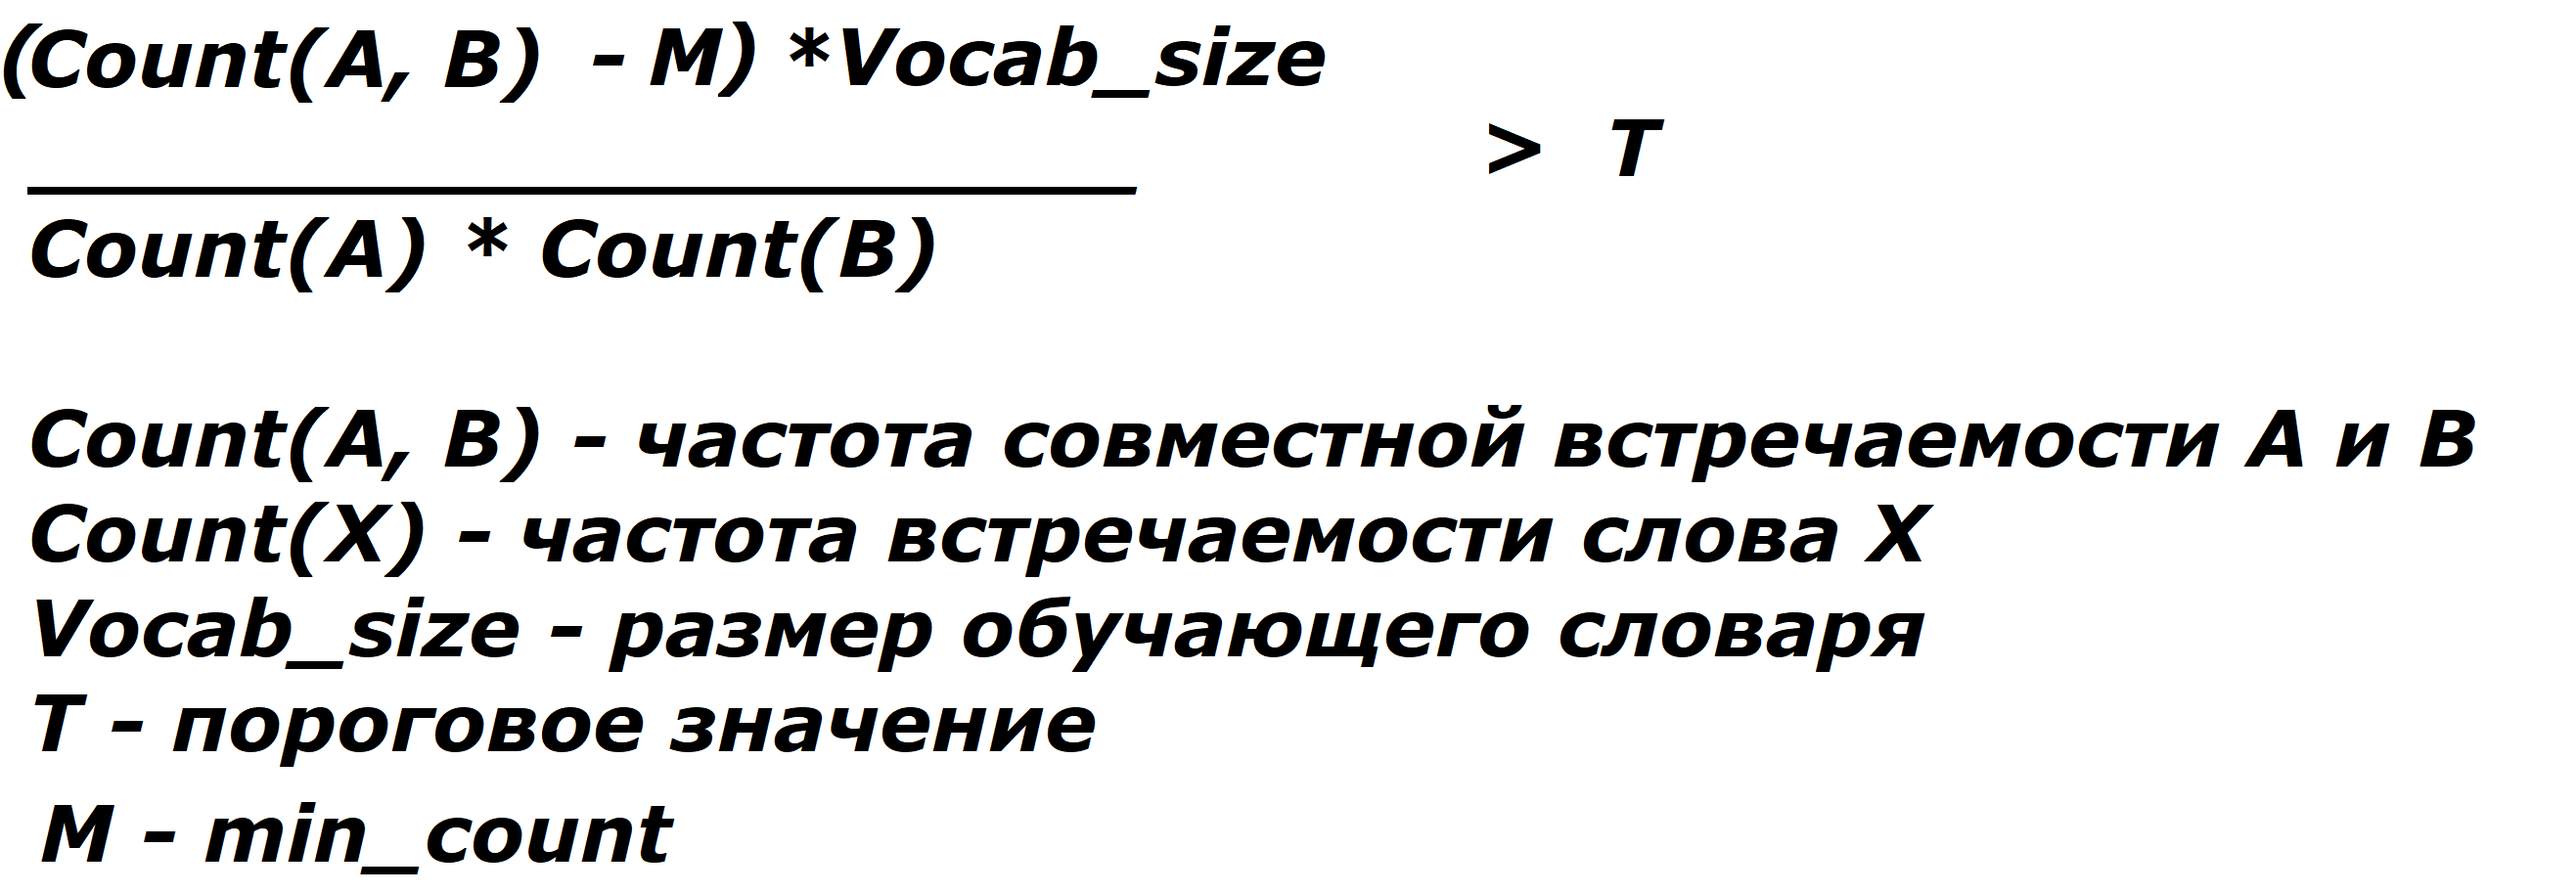

Vocab_size - количество уникальных токенов в предложении, словарем здесь мы называем список уникальных слов

Подробнее: глава 4 статьи [Distributed Representations of Words and Phrases
and their Compositionality](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf) (Mikolov et al., 2013)

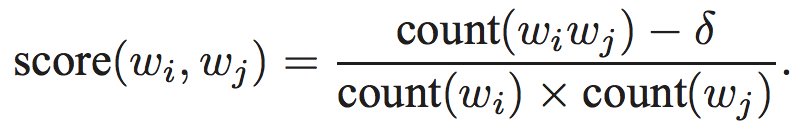

* `score(w_i, w_j)` - оценка совместной встречаемости любых двух слов 
* Чтобы посчитать триграммы, `w_i` должна быть биграммой, а `w_j` - отдельным словом и т.д.

[Исходный код](https://github.com/RaRe-Technologies/gensim/blob/bdcd1003dcaa2f10ae4c81755207d87d9926add9/gensim/models/phrases.py)

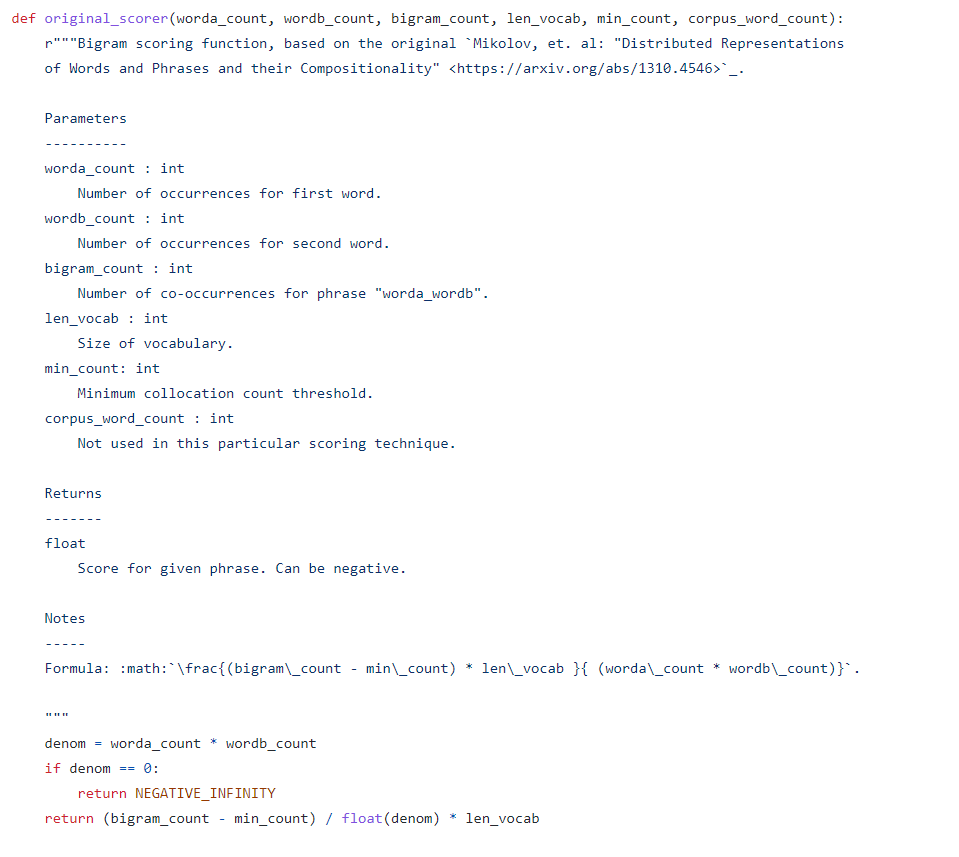

**connector_words**

- Список слов, которые могут быть включены в n-грамму
- N-грамма не может начинаться с коннектора
- Список включает артикли, предлоги, союзы
- Помогает формировать коллокации типа `bank_of_america`, `eye_of_the_beholder`
- Пример коннекторов для немецкого языка: `der, die, das`


**другие параметры**

* max_vocab_size – максимальный размер словаря
  * помогает экономить память устройства
  * опция актуальна для работы с более крупными датасетами 
  * настраивается в зависимости от доступного объема оперативной памяти устройства
  * по умолчанию - 40 миллионов слов, требует ~3.6 ГБ (Google Colab предоставляет ~13 ГБ)
  * актуально для запуска программы на собственном устройстве
   
* delimiter – тип разделителя для n-грамм, по умолчанию используется `_`

* scoring – тип / формула подсчета совместной встречаемости
  * gensim предлагает два варианта
    * default - мы разобрали выше
    * npmi - основан на алгоритме из статьи [Normalized (Pointwise) Mutual Information in Collocation Extraction](https://svn.spraakdata.gu.se/repos/gerlof/pub/www/Docs/npmi-pfd.pdf) (Gerlof Bouma, 2009)

    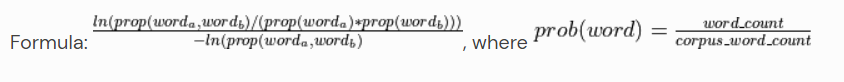

**Особенности NPMI**

* Пороговое значение между -1 и 1, т.к. используется вероятностный подход
* Дольше рассчитывается
* Лучше находит общеупотребительные коллокации (гипотетически, будет лучше работать с открытой предметной областью)

**Собственная функция**

Также для скоринга можно прописать собственную функцию для подсчета совместной встречаемости со следующими параметрами (модель должна просчитывать эти параметры):

* worda_count - частота встречаемости слова А
* wordb_count - частота встречаемости слова B
* bigram_count - частота встречаемости биграмм
* len_vocab - количество уникальных токенов в предложении 
* min_count - параметр min_count для класса Phrases
* corpus_word_count - всего токенов в предложении, включая повторяющиеся токены

**Образец работы биграммной модели**

In [21]:
#phrase_model = Phrases(sentences=cleaned_sw, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS, scoring='default')
#phrase_model_npmi = Phrases(sentences=cleaned_sw, min_count=1, threshold=0.5, connector_words=ENGLISH_CONNECTOR_WORDS, scoring='npmi')

In [22]:
from gensim.models import Phrases

phrase_model = Phrases(sentences=cleaned_sw, min_count=1, threshold=1, scoring='default')
phrase_model_npmi = Phrases(sentences=cleaned_sw, min_count=1, threshold=0.5, scoring='npmi')

In [23]:
phrase_model[cleaned_sw[20]]

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['scientists',
 'seek',
 'understand',
 'fundamental',
 'principles',
 'explain',
 'natural',
 'patterns',
 'processes',
 'science',
 'body',
 'knowledge',
 'science',
 'provides',
 'means',
 'evaluate',
 'create_new',
 'knowledge',
 'bias',
 'scientists_use',
 'objective_evidence',
 'subjective',
 'evidence',
 'reach_sound',
 'logical_conclusions']

In [24]:
phrase_model_npmi[cleaned_sw[20]]

['scientists',
 'seek',
 'understand',
 'fundamental_principles',
 'explain',
 'natural',
 'patterns',
 'processes',
 'science',
 'body',
 'knowledge',
 'science',
 'provides',
 'means',
 'evaluate',
 'create',
 'new',
 'knowledge_bias',
 'scientists',
 'use',
 'objective_evidence',
 'subjective',
 'evidence',
 'reach_sound',
 'logical_conclusions']

**Образец работы n-граммной модели**

1. Создаем биграммный корпус 

In [25]:
from colorama import Fore, Style

In [26]:
bigram_corpus = [phrase_model[sentence] for sentence in cleaned_sw]
print(f"{Fore.RED}Образец выдач биграммной модели{Style.RESET_ALL}\n {bigram_corpus[22]} \n {bigram_corpus[23]} \n {bigram_corpus[24]}")

Образец выдач биграммной модели
 ['way_scientists', 'avoid', 'bias', 'quantitative', 'qualitative', 'measurements', 'possible', 'quantitative', 'measurement', 'expressed', 'specific', 'numerical', 'value', 'qualitative_observations', 'general', 'relative', 'descriptions', 'example', 'describing_rock', 'red', 'heavy', 'qualitative', 'observation', 'determining_rock', 'color', 'measuring', 'wavelengths', 'reflected_light', 'density', 'measuring', 'proportions_minerals', 'contains', 'quantitative', 'numerical', 'values', 'precise', 'general', 'descriptions', 'analyzed', 'statistical', 'calculations', 'quantitative', 'measurements', 'useful_scientists', 'qualitative_observations'] 
 ['establishing', 'truth', 'science', 'difficult', 'scientific', 'claims', 'falsifiable', 'means', 'initial', 'hypothesis_tested', 'proven_false', 'exhaustively', 'eliminating', 'false', 'results', 'competing', 'ideas', 'possible', 'variations', 'hypothesis', 'regarded', 'reliable', 'scientific_theory', 'meticul

2. Используем биграммный корпус, чтобы обучить новую модель

In [27]:
trigram_model = Phrases(sentences=bigram_corpus, min_count=1, threshold=1, scoring='default')
print(f"{Fore.RED}Образец выдач n-граммной модели{Style.RESET_ALL}\n {trigram_model[bigram_corpus[22]]} \n {trigram_model[bigram_corpus[23]]} \n {trigram_model[bigram_corpus[24]]}")

Образец выдач n-граммной модели
 ['way_scientists', 'avoid', 'bias', 'quantitative', 'qualitative', 'measurements', 'possible', 'quantitative', 'measurement', 'expressed', 'specific', 'numerical', 'value', 'qualitative_observations', 'general', 'relative', 'descriptions', 'example', 'describing_rock', 'red', 'heavy', 'qualitative', 'observation', 'determining_rock', 'color', 'measuring', 'wavelengths', 'reflected_light', 'density', 'measuring', 'proportions_minerals', 'contains', 'quantitative', 'numerical', 'values', 'precise', 'general', 'descriptions', 'analyzed', 'statistical', 'calculations', 'quantitative', 'measurements', 'useful_scientists', 'qualitative_observations'] 
 ['establishing', 'truth', 'science', 'difficult', 'scientific', 'claims', 'falsifiable', 'means', 'initial', 'hypothesis_tested', 'proven_false', 'exhaustively', 'eliminating', 'false', 'results', 'competing', 'ideas', 'possible', 'variations', 'hypothesis', 'regarded', 'reliable', 'scientific_theory', 'meticul

Для выдач модели мы также используем в качестве входных данных корпус биграмм

Получим полный список n-грамм 

In [28]:
ngrams = [trigram_model[text] for text in bigram_corpus]

In [29]:
ngrams[22]

['way_scientists',
 'avoid',
 'bias',
 'quantitative',
 'qualitative',
 'measurements',
 'possible',
 'quantitative',
 'measurement',
 'expressed',
 'specific',
 'numerical',
 'value',
 'qualitative_observations',
 'general',
 'relative',
 'descriptions',
 'example',
 'describing_rock',
 'red',
 'heavy',
 'qualitative',
 'observation',
 'determining_rock',
 'color',
 'measuring',
 'wavelengths',
 'reflected_light',
 'density',
 'measuring',
 'proportions_minerals',
 'contains',
 'quantitative',
 'numerical',
 'values',
 'precise',
 'general',
 'descriptions',
 'analyzed',
 'statistical',
 'calculations',
 'quantitative',
 'measurements',
 'useful_scientists',
 'qualitative_observations']

# Term Frequency

In [30]:
from gensim.corpora import Dictionary
# создание словаря с помощью gensim.corpora
id2word = Dictionary(ngrams)

print(id2word)

# сортировка элементов, 
# добавляем все, что обнаружили, в общий список
# чтобы избежать повторов, мы также лемматизируем выдачи
# с помощью NLTK

lemmatizer = nltk.stem.WordNetLemmatizer()

all_ngrams = []
for elem in ngrams:
  for x in elem:
    # в новый список мы добавляем уже лемматизированное слово
    all_ngrams.append(lemmatizer.lemmatize(x))

# TF: подсчет частоты встречаемости элементов в корпусе

corpus = id2word.doc2bow(all_ngrams)
tf = [(id2word[id], freq) for id, freq in corpus]

print(f"{Fore.RED}Образец подсчета Term Frequency:{Style.RESET_ALL}\n", tf[:10])

Dictionary(31587 unique tokens: ['source', 'non_commercial_purposes', 'text_text', 'introduction_geology', 'college']...)
Образец подсчета Term Frequency:
 [('source', 80), ('non_commercial_purposes', 3), ('text_text', 2), ('introduction_geology', 1), ('college', 3), ('free', 15), ('introductory_geology', 3), ('level', 103), ('textbook', 14), ('science', 51)]


# Визуализация результата

In [31]:
# создаем DataFrame с результатами работы 
df = pd.DataFrame(tf, columns=['item', 'frequency']).sort_values(by=['frequency'], ascending=False)
df.head()

,item,frequency
1169,rock,577
805,water,360
257,form,339
1897,chapter,337
2904,mineral,333


In [32]:
# сохраянем в Excel

df.to_excel("output.xlsx")  